In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from functools import reduce
import random

In [2]:
snsC = {
    'font.size': 10.0,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'legend.fontsize': 'medium',
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.8,
    'lines.linewidth': 1.5,
    'lines.markersize': 6.0,
    'patch.linewidth': 1.0,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.minor.width': 0.6,
    'ytick.minor.width': 0.6,
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'xtick.minor.size': 2.0,
    'ytick.minor.size': 2.0,
    'legend.title_fontsize': None
}

In [3]:
train_df = pd.read_csv('../data/SemiFinal/train_data.csv')
val_df = pd.read_csv('../data/SemiFinal/validation_data.csv')

train_df.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,1071115,12/19/2021,1
1,category_4,210652,2/13/2022,1
2,category_2,877624,12/19/2021,1
3,category_1,371104,12/19/2021,3
4,category_1,1090294,12/19/2021,3


In [4]:
I2C_map = pd.Series(train_df.CategoryCode.values,index=train_df.ItemCode).to_dict()

In [5]:
saleD = pd.read_csv('../data/DSalesPointsV2.csv')
saleD.head()

,ItemCode,DailySales,CategoryCode
0,3418,"[18, 3, 8, 2, 4, 2, 8, 12, 0, 14, 2, 9, 8, 5, ...",category_1
1,3427,"[2, 7, 2, 3, 9, 0, 5, 8, 10, 5, 5, 4, 0, 4, 3,...",category_1
2,7666,"[14, 58, 12, 8, 5, 33, 11, 23, 24, 15, 41, 20,...",category_1
3,9925,"[1, 3, 1, 2, 0, 0, 2, 1, 0, 1, 8, 0, 2, 0, 0, ...",category_1
4,16936,"[4, 1, 4, 1, 0, 0, 21, 2, 1, 0, 5, 9, 2, 8, 8,...",category_1


In [6]:
saleW = pd.read_csv('../data/WSalesPointsV2.csv')
saleW.head()

,Unnamed: 0,ItemCode,#sales,stage,WeeklySales
0,0,3418,20,validation,"[83, 85, 89, 67, 109, 72, 29, 42, 41, 41, 44, ..."
1,1,3427,20,validation,"[66, 32, 34, 29, 58, 35, 11, 40, 20, 48, 54, 2..."
2,2,7666,20,validation,"[15, 26, 28, 38, 41, 39, 84, 119, 196, 185, 94..."
3,3,9925,20,test,"[8, 9, 14, 10, 8, 21, 1, 9, 11, 13, 5, 11, 11,..."
4,4,16936,20,test,"[74, 66, 43, 66, 48, 71, 9, 25, 40, 31, 21, 43..."


In [7]:
n = 15
random.seed(435)
C2I = train_df.groupby('CategoryCode').agg(list).to_dict()['ItemCode']
rnd_items = reduce(lambda x,y: x+random.choices(y, k=n), C2I.values(), [] )
strf_df = train_df.loc[train_df['ItemCode'].isin(rnd_items), :]
strf_df['DateID'] = pd.to_datetime(strf_df['DateID'])
strf_df

C:\Users\thari\AppData\Local\Temp\ipykernel_50136\1991771274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strf_df['DateID'] = pd.to_datetime(strf_df['DateID'])


,CategoryCode,ItemCode,DateID,DailySales
5,category_1,145330,2021-12-19,3
10,category_3,1101661,2021-12-19,7
12,category_3,1060630,2022-02-13,2
13,category_2,130993,2022-02-13,13
16,category_2,87046,2021-12-19,1
...,...,...,...,...
20634,category_1,839374,2021-10-12,5
20642,category_2,1070836,2021-10-12,7
20646,category_1,36898,2021-10-12,1
20649,category_3,1064572,2021-10-12,1


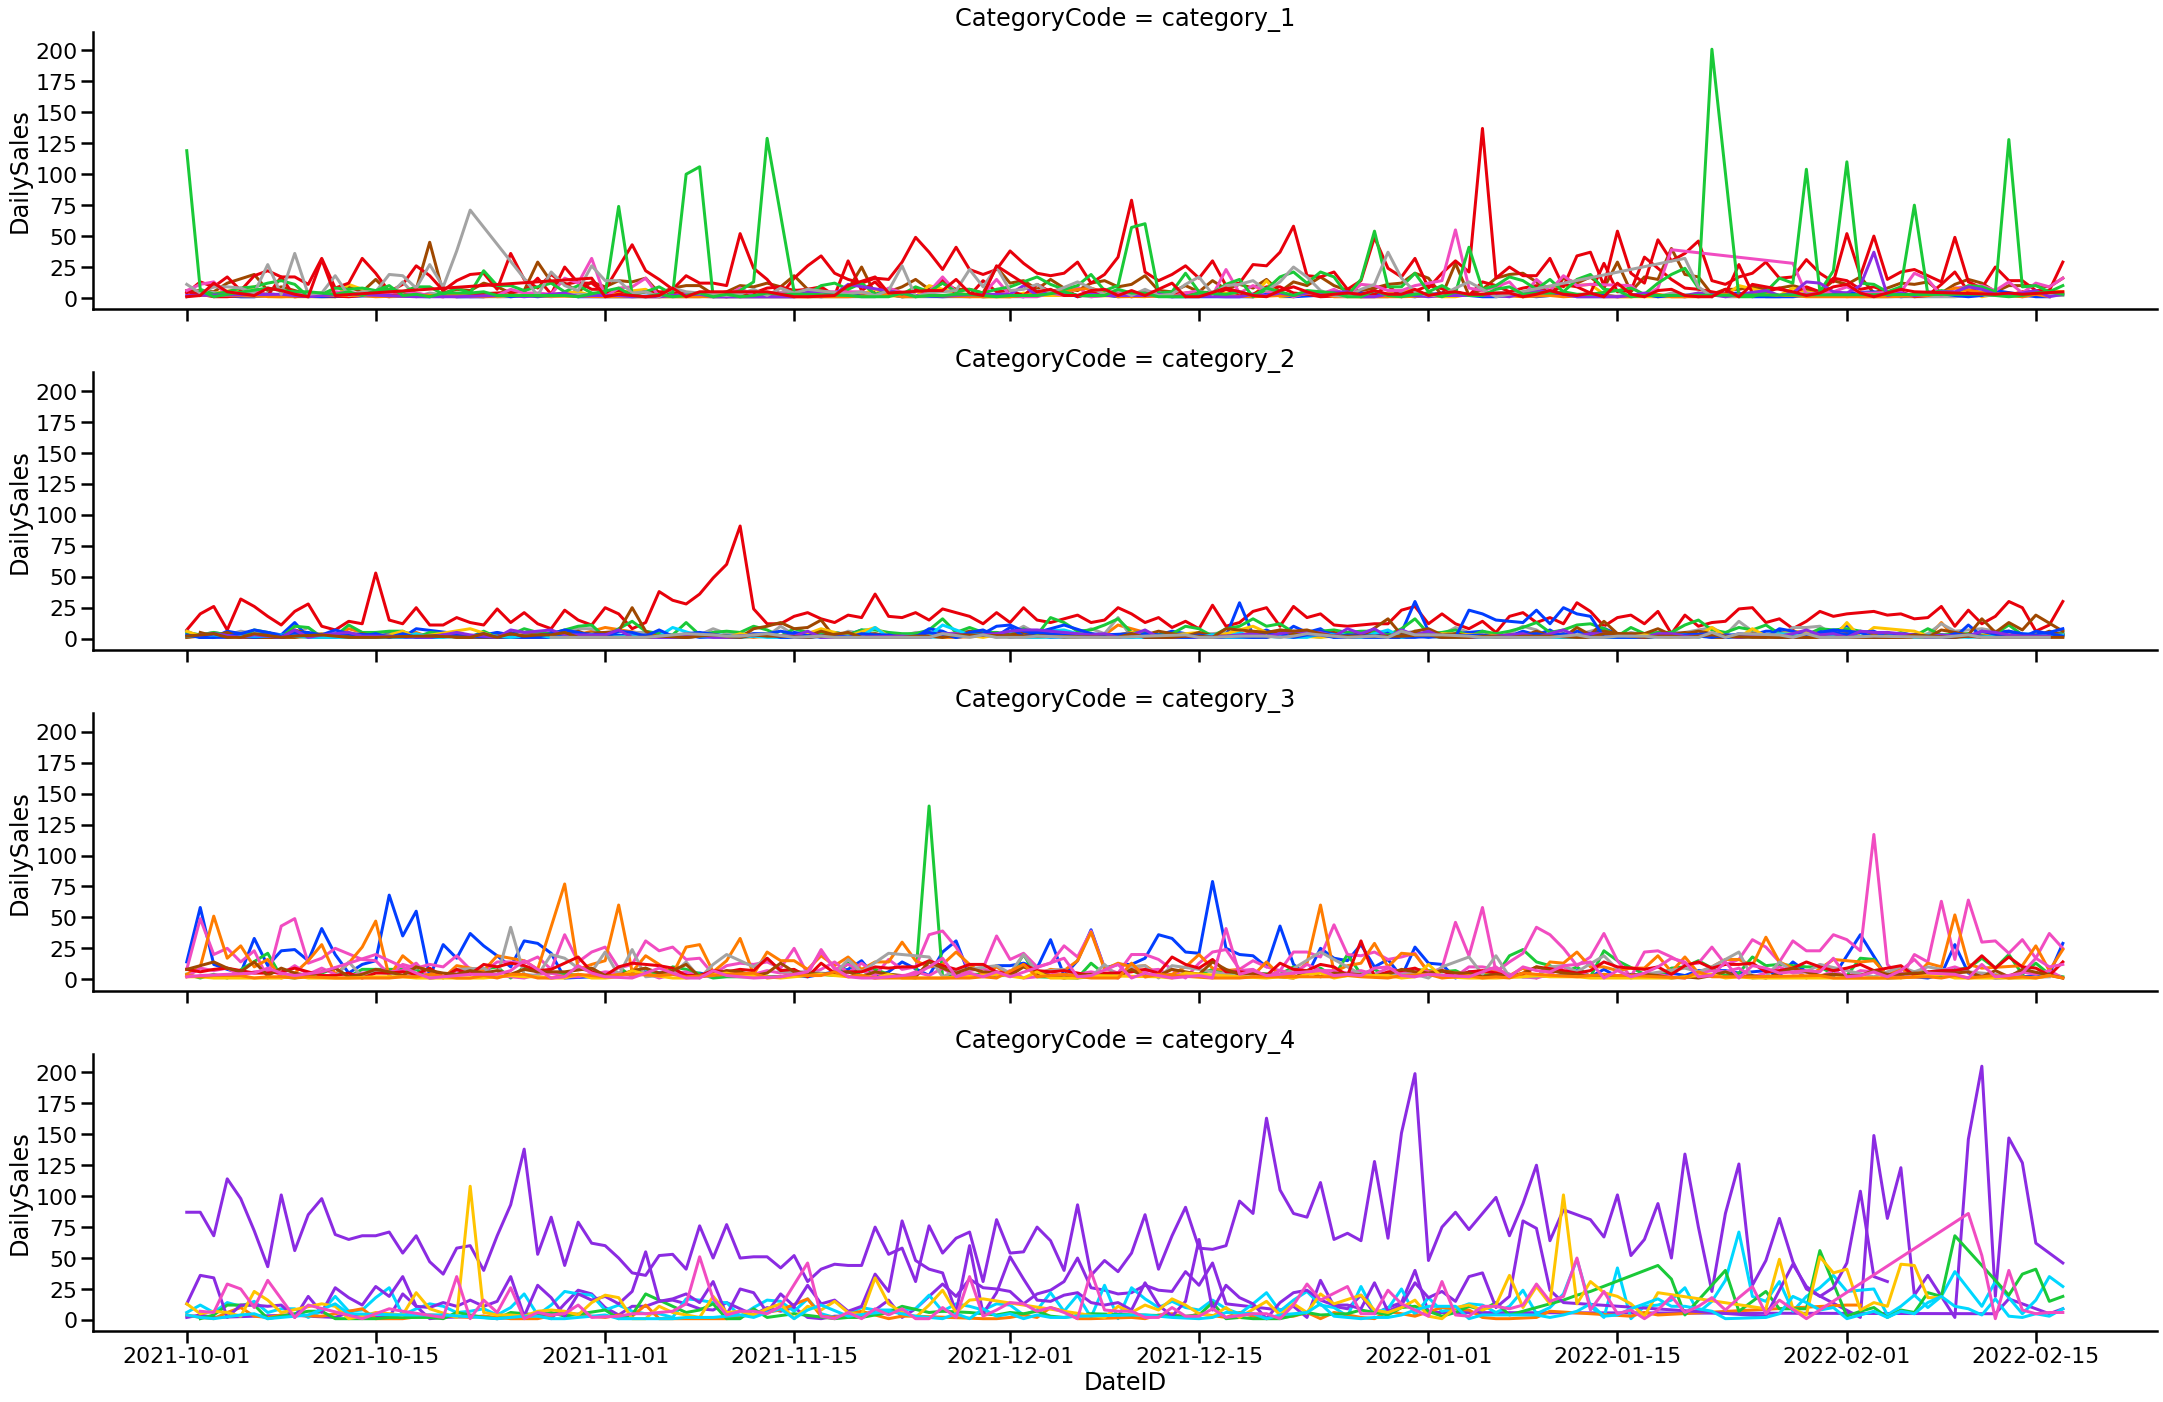

In [8]:
with sns.plotting_context("poster"):
    g = sns.relplot(x='DateID', y='DailySales', hue='ItemCode', row='CategoryCode', kind='line', data=strf_df, palette="bright", legend=False, row_order=['category_1', 'category_2', 'category_3', 'category_4'])
    g.fig.set_size_inches(60,20)

In [9]:
train_udf = pd.read_csv('../data/SemiFinal/train_data.csv')
train_udf.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,1071115,12/19/2021,1
1,category_4,210652,2/13/2022,1
2,category_2,877624,12/19/2021,1
3,category_1,371104,12/19/2021,3
4,category_1,1090294,12/19/2021,3
